In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
COIN_BLOCK_INFO_PATH = "coin_block_info"

coin = "XVG"
coin_per_block = 15
our_nethash = 540

fname = os.path.join(COIN_BLOCK_INFO_PATH, coin+"_block_info.csv")

In [4]:
df = pd.read_csv(fname)

In [10]:
df['date'] = pd.to_datetime(df['time'],unit='s')

In [11]:
print("Number of Blocks: {}".format(df.count()[0]))

Number of Blocks: 2000


In [12]:
print("Latest Block: {}".format(int(df["height"][0])))

Latest Block: 2118667


In [13]:
# COIN_NETHASH_INFO_PATH = "coin_nethash_info"
# fname = os.path.join(COIN_NETHASH_INFO_PATH, coin+"_nethash_info.csv")

In [14]:
# df_nethash = pd.read_csv(fname)

In [15]:
# df = pd.merge(df, df_nethash, how='inner', on='height')

In [17]:
df.head(10)

,algo,difficulty,flags,height,nonce,time,date
0,blake,9.561240e+06,proof-of-work,2118667.0,2.737940e+08,1.525696e+09,2018-05-07 12:34:40
1,blake,9.651126e+06,proof-of-work,2118666.0,1.007175e+08,1.525696e+09,2018-05-07 12:31:51
2,blake,1.012044e+07,proof-of-work,2118665.0,2.206100e+08,1.525696e+09,2018-05-07 12:31:50
3,blake,2.184485e+07,proof-of-work,2118664.0,2.735968e+08,1.525696e+09,2018-05-07 12:33:17
4,groestl,1.976887e+06,proof-of-work,2118663.0,2.804048e+09,1.525696e+09,2018-05-07 12:33:11
5,x17,1.345613e+04,proof-of-work,2118662.0,6.320538e+08,1.525696e+09,2018-05-07 12:31:49
6,x17,6.982059e+03,proof-of-work,2118661.0,2.868660e+09,1.525696e+09,2018-05-07 12:32:13
7,groestl,1.907150e+06,proof-of-work,2118660.0,3.871396e+08,1.525696e+09,2018-05-07 12:32:03
8,x17,7.337786e+03,proof-of-work,2118659.0,2.101141e+09,1.525696e+09,2018-05-07 12:31:55
9,groestl,2.237265e+06,proof-of-work,2118658.0,6.723614e+08,1.525696e+09,2018-05-07 12:31:29


In [18]:
df_type = df.groupby("flags").size().reset_index(name='counts')
df_type["percentage"]=df_type["counts"]/sum(df_type["counts"])
df_type

,flags,counts,percentage
0,proof-of-work,1996,0.998
1,proof-of-work stake-modifier,4,0.002


In [20]:
df_algo = df.groupby("algo").size().reset_index(name='counts')
df_algo["percentage"]=df_algo["counts"]/sum(df_algo["counts"])
df_algo

,algo,counts,percentage
0,blake,405,0.2025
1,groestl,408,0.2040
2,lyra2re,387,0.1935
3,scrypt,401,0.2005
4,x17,399,0.1995


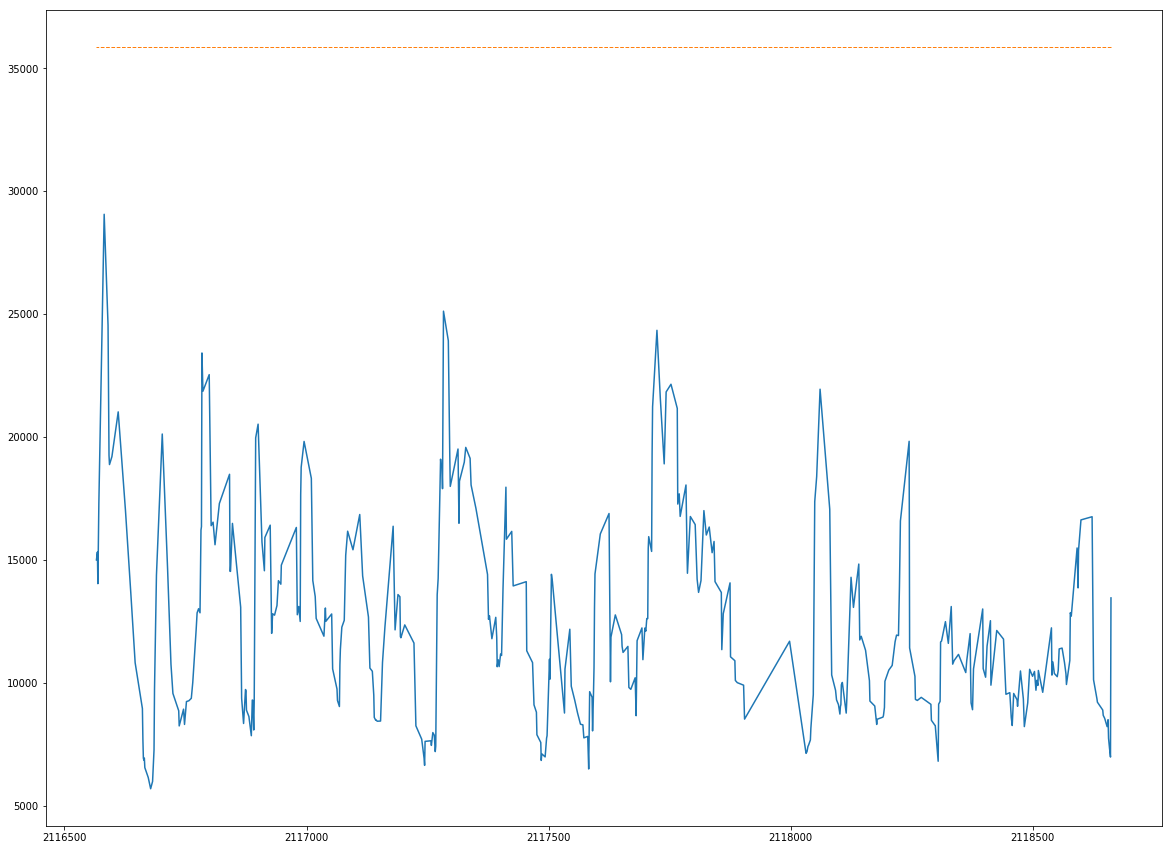

In [27]:
algo = 'x17'
fig = plt.figure(figsize=(20,15))
plt.subplot(1, 1, 1)
plt.plot(df[df['algo']==algo]['height'], df[df['algo']==algo]['difficulty'])
plt.plot(df[df['algo']==algo]['height'], 
         [np.mean(df[df['algo']=='lyra2re']['difficulty'])]*df[df['algo']==algo]['difficulty'].count(), 
         linestyle = '--', linewidth = 1)

In [12]:
df_pow_block_rate = df[['flags','height','time', 'nethash']][df['flags'].str.contains("proof-of-work")].reset_index()
df_pow_block_rate.head(10)

,index,flags,height,time,nethash
0,11,proof-of-work,151661,1.525693e+09,186242
1,14,proof-of-work,151658,1.525693e+09,129060
2,15,proof-of-work,151656,1.525693e+09,164650
3,24,proof-of-work stake-modifier,151641,1.525692e+09,136322
4,25,proof-of-work,151640,1.525692e+09,112859
5,26,proof-of-work,151639,1.525692e+09,86091
6,27,proof-of-work,151638,1.525692e+09,284813
7,39,proof-of-work,151625,1.525692e+09,233265
8,40,proof-of-work stake-modifier,151624,1.525692e+09,168887
9,41,proof-of-work,151622,1.525691e+09,120474


In [13]:
height_MA_window = min(400, int((df_pow_block_rate.count()[0]-1)*0.5))
print("Block Height MA Windows = {}".format(height_MA_window))

nethash_MA_window = 50
print("Nethash MA Windows = {}".format(nethash_MA_window))

Block Height MA Windows = 172
Nethash MA Windows = 50


In [14]:
df_pow_count = df_pow_block_rate.count()[0]
print("Num of POW = {}".format(df_pow_count))

Num of POW = 345


In [15]:
df_pow_block_rate['pow_index'] = pd.DataFrame(range(df_pow_count)[::-1])
df_pow_block_rate.tail(5)

,index,flags,height,time,nethash,pow_index
340,1063,proof-of-work,149628,1.525617e+09,256856,4
341,1064,proof-of-work,149627,1.525617e+09,219165,3
342,1065,proof-of-work,149626,1.525617e+09,158028,2
343,1068,proof-of-work,149621,1.525617e+09,277524,1
344,1069,proof-of-work stake-modifier,149619,1.525617e+09,258909,0


In [16]:
df_pow_block_rate_window = df_pow_block_rate[["time", "pow_index"]].diff(-height_MA_window)
df_pow_block_rate_window_row_count = int(df_pow_block_rate_window.count()[0])
df_pow_block_rate_window['block_per_day']=df_pow_block_rate_window['pow_index']/df_pow_block_rate_window['time']*3600*24
print("Number of Rows in POW Height MA = {}".format(df_pow_block_rate_window_row_count))
df_pow_block_rate_window.head(8)

Number of Rows in POW Height MA = 173


,time,pow_index,block_per_day
0,46659.0,172.0,318.498039
1,46875.0,172.0,317.030400
2,46973.0,172.0,316.368978
3,46844.0,172.0,317.240202
4,46929.0,172.0,316.665601
5,46927.0,172.0,316.679097
6,47393.0,172.0,313.565294
7,46752.0,172.0,317.864476


In [17]:
df_nethash_MA = df_pow_block_rate[["nethash"]].rolling(window=5).mean()
df_nethash_MA_row_count = int(df_nethash_MA.count()[0])
print("Number of Rows in Nethash MA = {}".format(df_nethash_MA_row_count))
df_nethash_MA.head(8)

Number of Rows in Nethash MA = 341


,nethash
0,NaN
1,NaN
2,NaN
3,NaN
4,145826.6
5,125796.4
6,156947.0
7,170670.0


In [18]:
df_pow_block_rate_full = pd.concat([df_pow_block_rate_window, df_nethash_MA, df["height"]],axis=1)
df_pow_block_rate_full_row_count = df_pow_block_rate_full.count()[0]
print(df_pow_block_rate_full_row_count)
df_pow_block_rate_full = df_pow_block_rate_full.dropna()
df_pow_block_rate_full.head(5)

173


,time,pow_index,block_per_day,nethash,height
4,46929.0,172.0,316.665601,145826.6,151670
5,46927.0,172.0,316.679097,125796.4,151669
6,47393.0,172.0,313.565294,156947.0,151668
7,46752.0,172.0,317.864476,170670.0,151667
8,46825.0,172.0,317.368927,177183.0,151666


In [19]:
df_pow_nethash_block_profit = df_pow_block_rate_full
df_pow_nethash_block_profit["profit"] = df_pow_block_rate_full["block_per_day"]*our_nethash/df_pow_block_rate_full["nethash"]*coin_per_block
df_pow_nethash_block_profit.head(5)

,time,pow_index,block_per_day,nethash,height,profit
4,46929.0,172.0,316.665601,145826.6,151670,17.589324
5,46927.0,172.0,316.679097,125796.4,151669,20.390891
6,47393.0,172.0,313.565294,156947.0,151668,16.183036
7,46752.0,172.0,317.864476,170670.0,151667,15.085851
8,46825.0,172.0,317.368927,177183.0,151666,14.508662


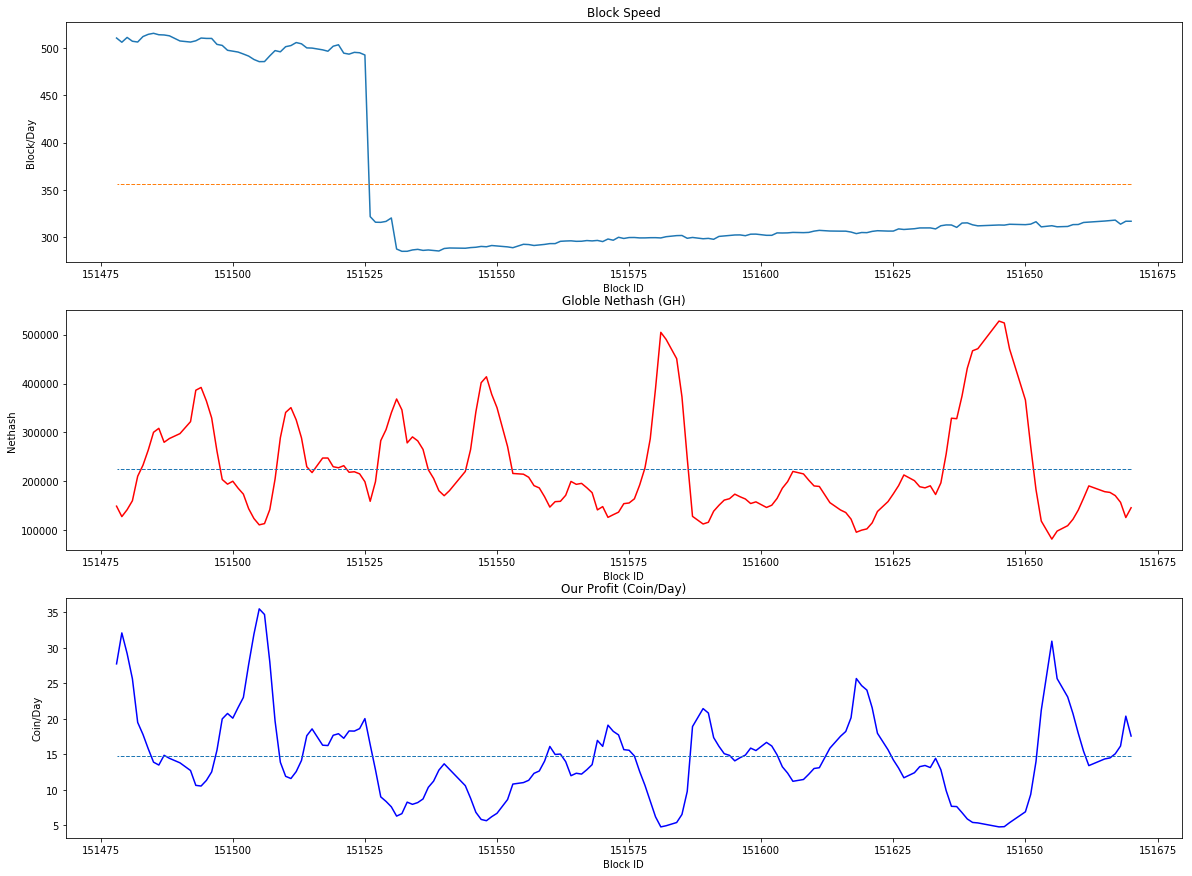

In [20]:
fig = plt.figure(figsize=(20,15))
plt.subplot(3, 1, 1)
plt.plot(df_pow_nethash_block_profit['height'], df_pow_nethash_block_profit['block_per_day'])
plt.plot(df_pow_nethash_block_profit['height'], 
         [np.mean(df_pow_nethash_block_profit['block_per_day'])]*df_pow_nethash_block_profit['height'].count(), 
         linestyle = '--', linewidth = 1)

plt.title('Block Speed')
plt.xlabel('Block ID')
plt.ylabel('Block/Day')

plt.subplot(3, 1, 2)
plt.plot(df_pow_nethash_block_profit['height'], df_pow_nethash_block_profit['nethash'], color='red')
plt.plot(df_pow_nethash_block_profit['height'], 
         [np.mean(df_pow_nethash_block_profit['nethash'])]*df_pow_nethash_block_profit['height'].count(), 
         linestyle = '--', linewidth = 1)
plt.title('Globle Nethash (GH)')
plt.xlabel('Block ID')
plt.ylabel('Nethash')

plt.subplot(3, 1, 3)
plt.plot(df_pow_nethash_block_profit['height'], df_pow_nethash_block_profit['profit'], color='blue')
plt.plot(df_pow_nethash_block_profit['height'], 
         [np.mean(df_pow_nethash_block_profit['profit'])]*df_pow_nethash_block_profit['height'].count(), 
         linestyle = '--', linewidth = 1)
plt.title('Our Profit (Coin/Day)')
plt.xlabel('Block ID')
plt.ylabel('Coin/Day')

plt.show()
